<a href="https://colab.research.google.com/github/iamayeshashaik/14-reverse/blob/main/question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 [Marks 40]


Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params. Please note: Visualisation is
mandatory. You will receive 0 marks if you do not add visualisation.

Data Link -https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/epilepsy.data

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

## Loading Dataset

In [ ]:
df = pd.read_csv("D:\Desktop\Ds exam\epilepsy.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df["MDVP:PPQ"] = df["MDVP:PPQ"].fillna(df["MDVP:PPQ"].mean())

In [ ]:
df["Jitter:DDP"] = df["Jitter:DDP"].fillna(df["Jitter:DDP"].mean())

In [ ]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df["status"].unique()

array([1, 0], dtype=int64)

--> Our target column is status so moving it to last

In [ ]:
df1 = df.pop('status')
df['status'] = df1

In [ ]:
df.status.value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002751,0.008902,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001890,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002750,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


## Data Visualization using seaborn

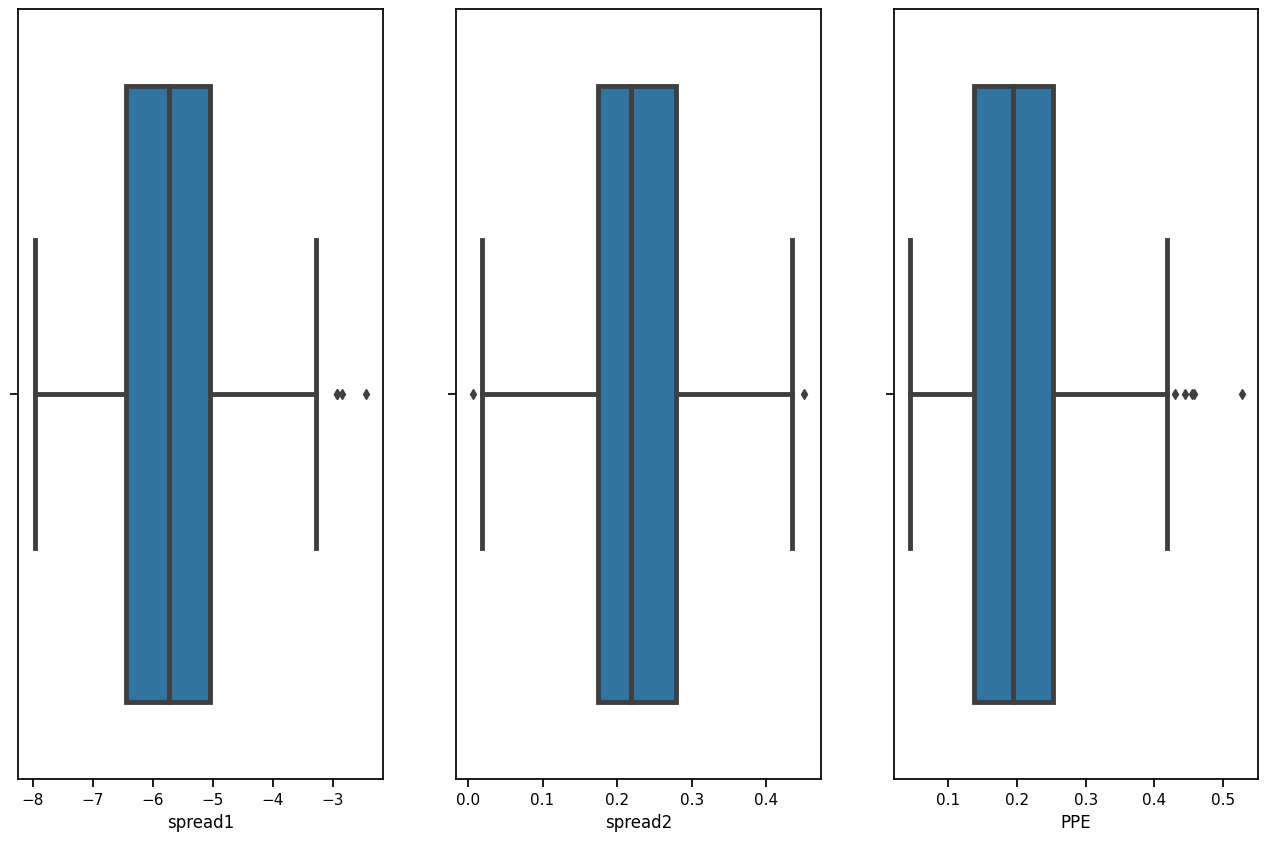

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,10))
sns.boxplot(x= 'spread1', data=df, ax=ax[0])
sns.boxplot(x= 'spread2', data=df, ax=ax[1])
sns.boxplot(x='PPE', data=df, ax=ax[2])
plt.show()

--> The above figure shows the box plot of the frequency variation. All the three variations have outliers.

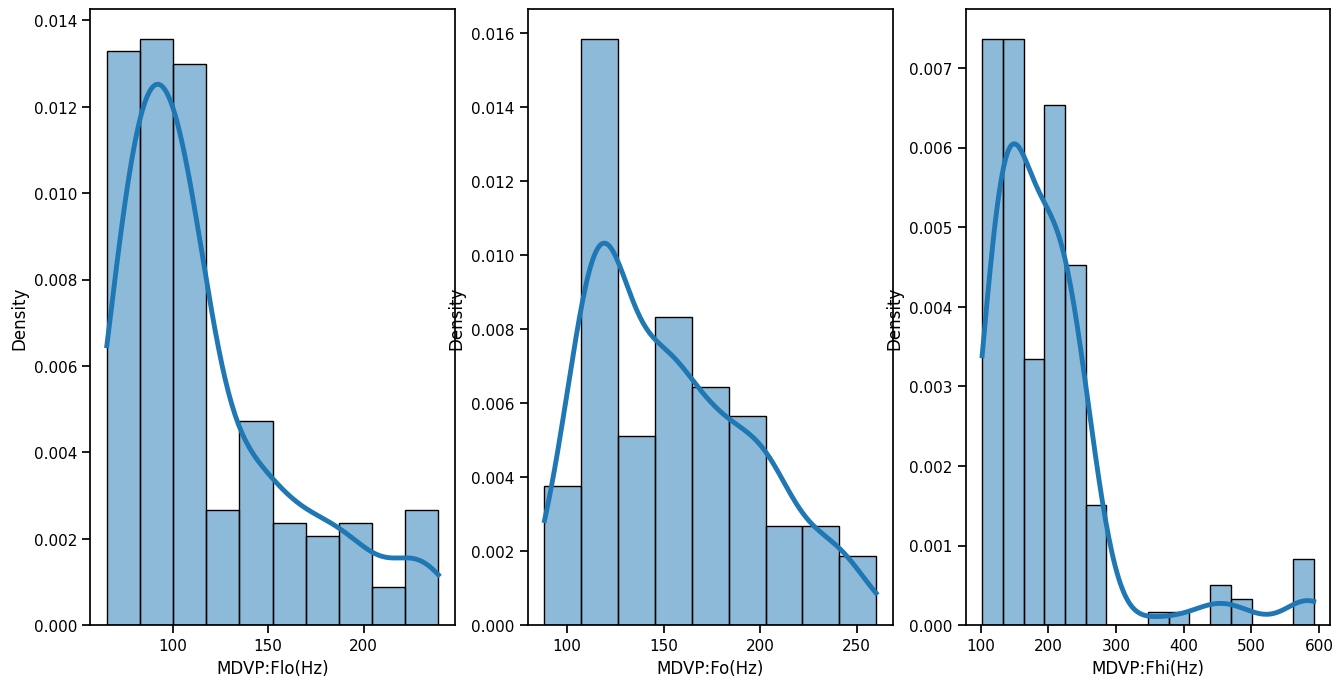

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,8))
sns.histplot(df['MDVP:Flo(Hz)'],ax=ax[0], kde=True, stat="density")
sns.histplot(df['MDVP:Fo(Hz)'],ax=ax[1], kde=True, stat="density")
sns.histplot(df['MDVP:Fhi(Hz)'],ax=ax[2], kde=True, stat="density")
plt.show()

--> In above plot shows the measures of vocal fundamental frequency.

--> There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz.

--> The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz.

<AxesSubplot: xlabel='HNR', ylabel='Density'>

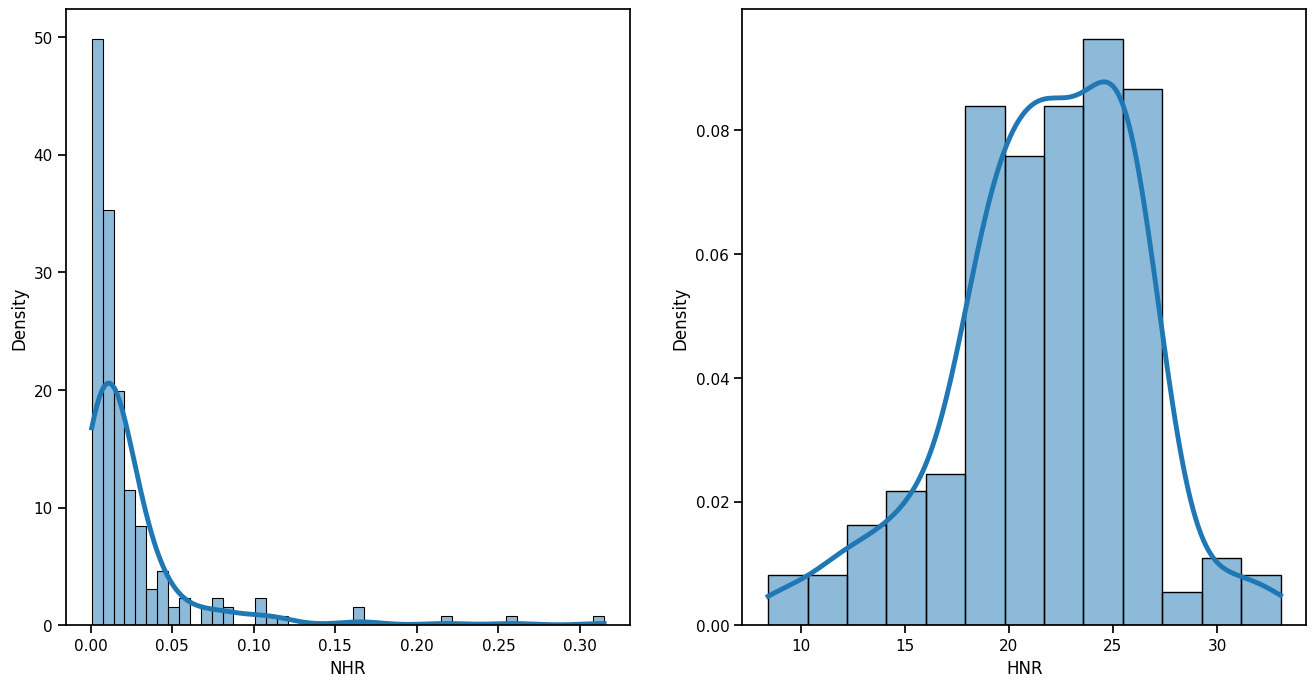

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.histplot(df['NHR'],ax=ax[0], kde=True, stat="density")
sns.histplot(df['HNR'],ax=ax[1], kde=True, stat="density")

--> In above plot shows the the measure of tonal component of frequency.

<AxesSubplot: xlabel='spread1', ylabel='Density'>

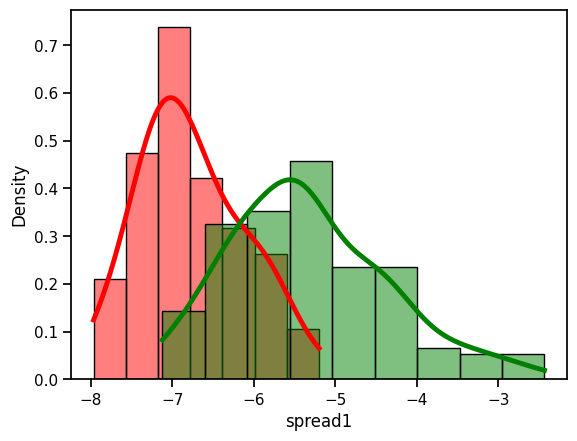

In [ ]:
sns.histplot( df[df.status == 0]['spread1'], color = 'r', kde=True, stat= "density")
sns.histplot( df[df.status == 1]['spread1'], color = 'g', kde=True, stat= "density")

Spread1 is normally distributed between person who have PD and who is normal.
People who have spread1 between - 8.5 and -7.5 are more and they are normal.
People whose spread1 is between -6.5 and -5 are having PD

C:\Users\tharu\AppData\Local\Temp\ipykernel_19732\1853714968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


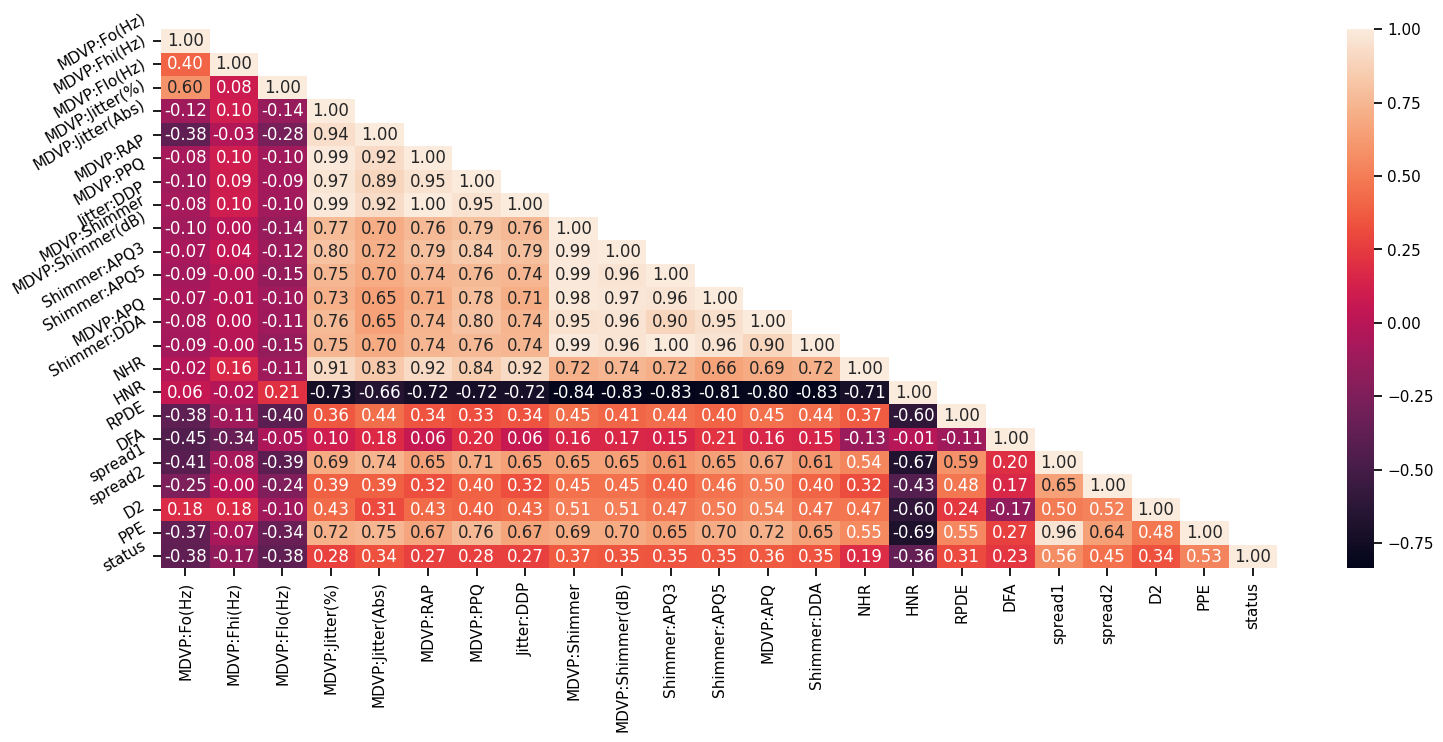

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

--> Above heatmap plot shows the co-relation of data.

## Model-1 Decission Tree

In [ ]:
# Importing models
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system

In [ ]:
df.drop("name", axis=1, inplace=True)

In [ ]:
X = df.drop("status",axis=1)
Y = df["status"]

In [ ]:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)
print(len(X_train)),print(len(X_test))

136
59


(None, None)

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)

In [ ]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       random_state=100)

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease= 1e-07, min_samples_leaf=5, min_samples_split= 2, min_weight_fraction_leaf=0.0,
            random_state=100, splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=6,
                       min_impurity_decrease=1e-07, min_samples_leaf=5,
                       random_state=100)

In [ ]:
dt_model.score(X_test , y_test)

0.8983050847457628

--> After using Decission Tree model the prediction is 0.89

In [ ]:
y_pred = dt_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  4],
       [ 2, 42]], dtype=int64)

In [ ]:
#Count mis-classified one
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 6


In [ ]:
from IPython.display import Image
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.113981
MDVP:Fhi(Hz)      0.196589
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.073695
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.056276
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.000000
spread1           0.205876
spread2           0.000000
D2                0.000000
PPE               0.353584


## Model-2: K Nearest Neighbour

In [ ]:
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

0.8305084745762712

--> After Using KNN The prediction values 0.83

In [ ]:
y_pred = k_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

Misclassified samples in KNN: 10


## Model-3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.9322033898305084

--> After using Random forest classifier the prediction values is 0.93

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


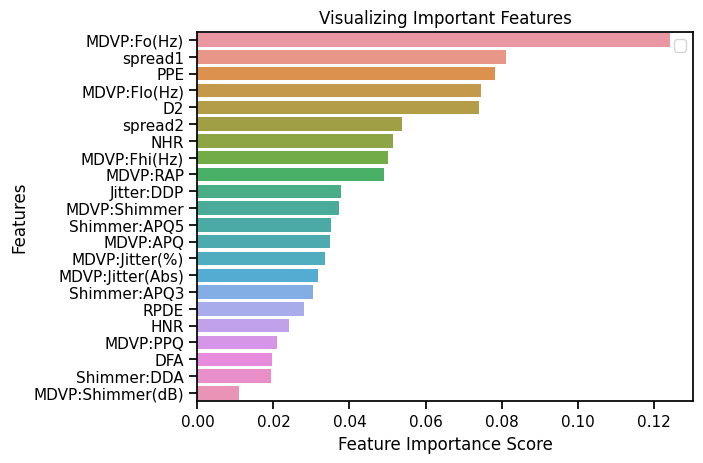

In [ ]:
feature_imp = pd.Series(rfcl.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Model-4: Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(estimator=dt_model, n_estimators=50, max_samples=.7)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)
bgcl.score(X_test , y_test)

0.9152542372881356

--> After using Bagging Model the prediction values is 0.91

## Conclusion

1. On this data set preformed 4 ML model for predictions
2. The highest prediction is given by Random forest classifier of 0.93 which is close to 1.
3. Data Visualization is conducted on this data set.